**Recife**

In [2]:
# Importando módulos internos
import geocov19_functions_results as fresults

# Importando módulos externos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statistics import mean
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /home/mario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db = client.SpedDB
collection = db.tweets_brasil

In [4]:
city = 'Recife'
df = pd.DataFrame.from_records(collection.find({'lang': 'pt', 'city':city, 'score': {'$ne':None}, '$or':[{'geo_source':'place'}, {'geo_source':'user_location'}]}, {'state':1,'city':1,'lang':1,'geo_source':1,'score':1,'created_at':1,'text':1,'polarity':1,'_id': 0}).sort('created_at'))

In [6]:
len(df)

34260

In [7]:
df.head()

,created_at,geo_source,state,city,text,score,lang,polarity
0,2020-02-02 11:41:02,user_location,Pernambuco,Recife,RT @leonardocb11: Pior que o Coronavirus é o #...,-0.4767,pt,NaN
1,2020-02-02 11:41:31,user_location,Pernambuco,Recife,RT @MirandaSa_: ÚLTIMAS NOTÍCIAS - Coronavírus...,0.5319,pt,NaN
2,2020-02-02 12:37:32,user_location,Pernambuco,Recife,Coronavírus: brasileiros em Wuhan pedem a Bols...,-0.0516,pt,NaN
3,2020-02-02 12:50:11,user_location,Pernambuco,Recife,RT @da_goiabeira: Passam a vida criticando a c...,-0.3612,pt,NaN
4,2020-02-02 12:50:43,user_location,Pernambuco,Recife,RT @jc_pe: Primeira morte por coronavírus fora...,-0.5994,pt,NaN


Média total de sentimentos - Vader

In [8]:
df['score'].describe()

count    34260.000000
mean        -0.053742
std          0.424983
min         -0.997000
25%         -0.381800
50%          0.000000
75%          0.202300
max          0.998900
Name: score, dtype: float64

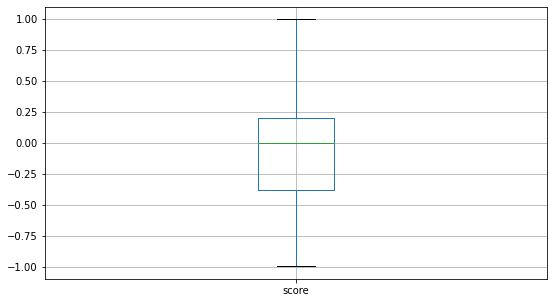

In [9]:
boxplot = df.boxplot(column=['score'], grid=True, figsize=(9, 5))

Média de sentimentos por dia - Vader x SenticNet

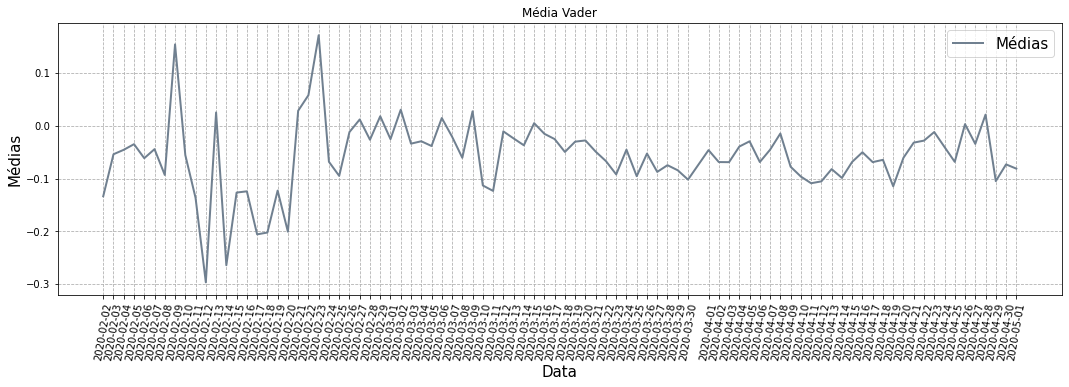

In [10]:
df1 = fresults.building_dates_df(df, 'score')

x = df1.created_at
y = df1.score_mean

color = 'slategrey'

label = 'Médias'
xLabel = 'Data'
yLabel = 'Médias'

title = 'Média Vader'

fresults.generate_graphic(x, y, label, color, xLabel, yLabel, title)

Análises por período

In [11]:
# Carregando arquivo CSV contendo casos de covid 19 do Brasil
file = '/home/mario/Documentos/LCDIA/Analytics/Datasets/caso_full.csv'
df_cases_brasil = pd.read_csv(file, usecols=['city', 'state', 'date', 'new_confirmed', 'new_deaths','last_available_confirmed','last_available_deaths','last_available_confirmed_per_100k_inhabitants','last_available_death_rate'])

In [12]:
# Selecionando casos da cidade analisada
df_cases_city = df_cases_brasil.query('city == "'+city+'"')
df_cases_city = df_cases_city.reset_index()
df_cases_city.head()

,index,city,date,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,state,new_confirmed,new_deaths
0,114,Recife,2020-03-12,2,0.12096,0.0,0,PE,2,0
1,151,Recife,2020-03-13,2,0.12096,0.0,0,PE,0,0
2,194,Recife,2020-03-14,6,0.36288,0.0,0,PE,4,0
3,242,Recife,2020-03-15,7,0.42335,0.0,0,PE,1,0
4,296,Recife,2020-03-16,7,0.42335,0.0,0,PE,0,0


In [13]:
# Data do primeiro caso 
first_case_date = df_cases_city.loc[0, 'date']
print(first_case_date)

2020-03-12


In [14]:
# Data da primeira morte
result = df_cases_city.query('last_available_deaths != "0"')
first_death_date = df_cases_city.loc[min(result.index), 'date']
print(first_death_date)

2020-03-25


In [15]:
# Data da primeira morte
result = df_cases_city.query('last_available_deaths != "0"')
first_death_date = df_cases_city.loc[min(result.index), 'date']
print(first_death_date)

2020-03-25


**Análises por Período - Geral**

In [16]:
df_periodo1 = df.query('created_at >= "2020-02-01 00:00:00" and created_at <= "2020-03-11 23:59:59"')
print(len(df_periodo1))

df_periodo2 = df.query('created_at >= "2020-03-12 00:00:00" and created_at <= "2020-03-13 23:59:59"')
print(len(df_periodo2))

df_periodo3 = df.query('created_at >= "2020-03-14 00:00:00" and created_at <= "2020-05-01 23:59:59"')
print(len(df_periodo3))

3206
1229
29825


In [17]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

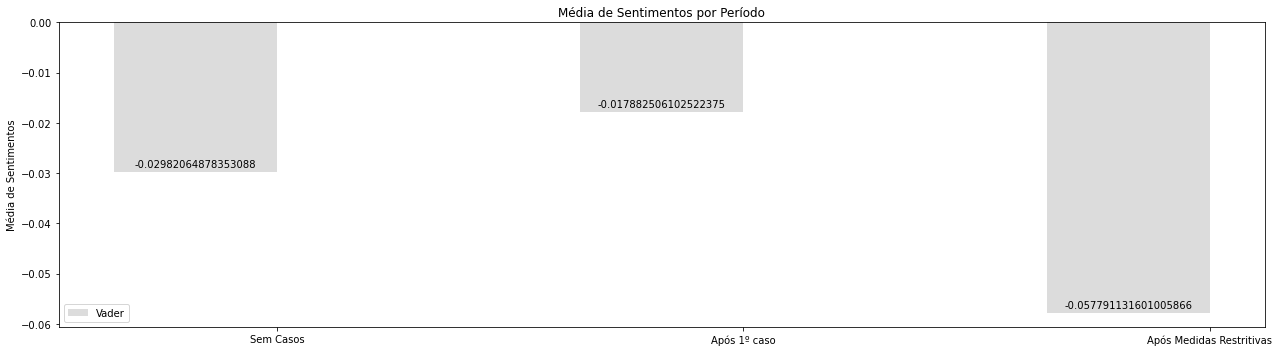

In [18]:
labels = ['Sem Casos', 'Após 1º caso', 'Após Medidas Restritivas']
y1 = [mean(df_periodo1['score']), mean(df_periodo2['score']), mean(df_periodo3['score'])]
y2 = [mean(df_periodo1['polarity']), mean(df_periodo2['polarity']), mean(df_periodo3['polarity'])]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y1, width, label='Vader', color='gainsboro')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Média de Sentimentos')
ax.set_title('Média de Sentimentos por Período')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)

fig.tight_layout()

plt.show()

***
**Análises por Período - Detalhado**

**Tweets Negativos**

In [19]:
start = df['score'].describe()['min']
end = df['score'].describe()['25%']

Nuvem de palavras dos tweets mais negativos

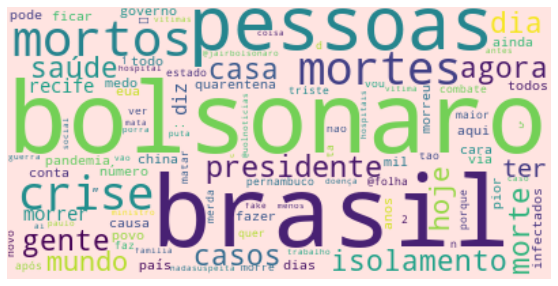

In [20]:
tokens_neg = fresults.return_tokens_from_interval(df, start, end)
fresults.generate_cloud_from_tokens(tokens_neg, 'mistyrose')

Palavras presentes nos tweets que mais influenciaram negativamente

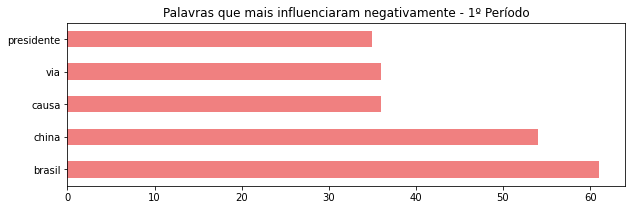

In [21]:
title = 'Palavras que mais influenciaram negativamente - 1º Período'
tokens_neg_1 = fresults.return_tokens_from_interval(df_periodo1, start, end)
fresults.generate_bar_from_tokens(tokens_neg_1, 5, 'lightcoral', 10, 3, title)

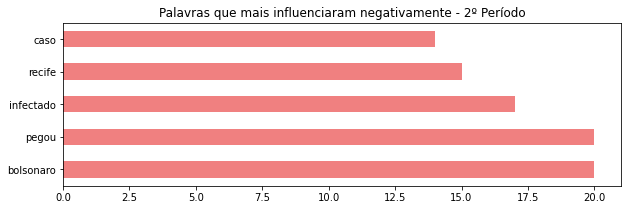

In [22]:
title = 'Palavras que mais influenciaram negativamente - 2º Período'
tokens_neg_2 = fresults.return_tokens_from_interval(df_periodo2, start, end)
fresults.generate_bar_from_tokens(tokens_neg_2, 5, 'lightcoral', 10, 3, title)

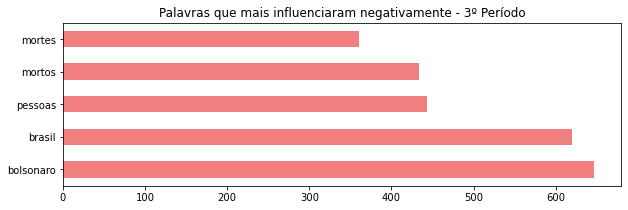

In [23]:
title = 'Palavras que mais influenciaram negativamente - 3º Período'
tokens_neg_3 = fresults.return_tokens_from_interval(df_periodo3, start, end)
fresults.generate_bar_from_tokens(tokens_neg_3, 5, 'lightcoral', 10, 3, title)

Hashtags que mais influenciaram negativamente

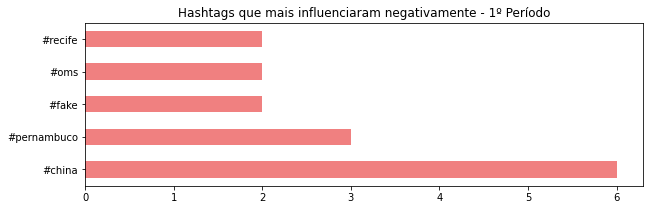

In [24]:
title = 'Hashtags que mais influenciaram negativamente - 1º Período'
fresults.generate_bar_from_filtered_tokens(tokens_neg_1, 5, '#', 'lightcoral', 10, 3, title)

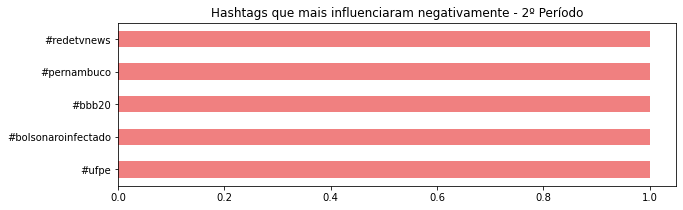

In [25]:
title = 'Hashtags que mais influenciaram negativamente - 2º Período'
fresults.generate_bar_from_filtered_tokens(tokens_neg_2, 5, '#', 'lightcoral', 10, 3, title)

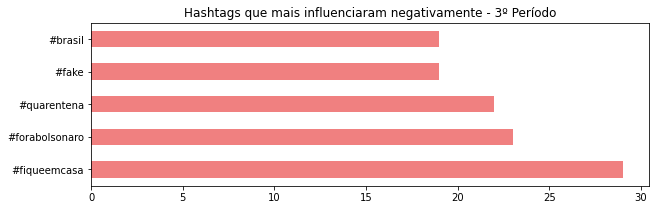

In [26]:
title = 'Hashtags que mais influenciaram negativamente - 3º Período'
fresults.generate_bar_from_filtered_tokens(tokens_neg_3, 5, '#', 'lightcoral', 10, 3, title)

**Tweets Positivos**

In [27]:
start = df['score'].describe()['75%']
end = df['score'].describe()['max']

Nuvens de palavras que influenciaram positivamente

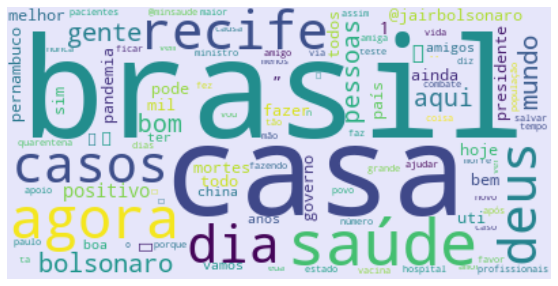

In [28]:
tokens_pos = fresults.return_tokens_from_interval(df, start, end)
fresults.generate_cloud_from_tokens(tokens_pos, 'lavender')

Palavras presentes nos tweets que mais influenciaram positivamente

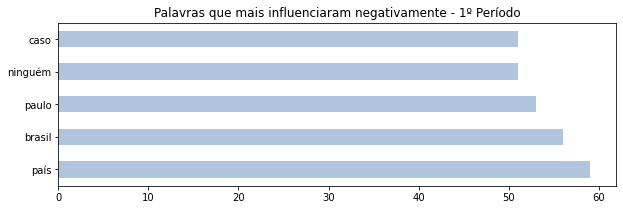

In [29]:
title = 'Palavras que mais influenciaram negativamente - 1º Período'
tokens_pos_1 = fresults.return_tokens_from_interval(df_periodo1, start, end)
fresults.generate_bar_from_tokens(tokens_pos_1, 5, 'lightsteelblue', 10, 3, title)

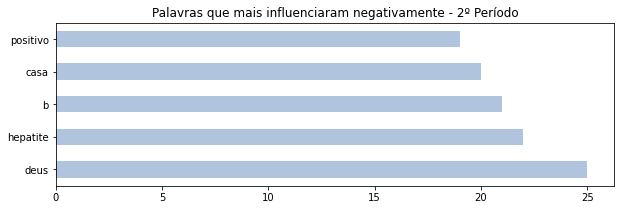

In [30]:
title = 'Palavras que mais influenciaram negativamente - 2º Período'
tokens_pos_2 = fresults.return_tokens_from_interval(df_periodo2, start, end)
fresults.generate_bar_from_tokens(tokens_pos_2, 5, 'lightsteelblue', 10, 3, title)

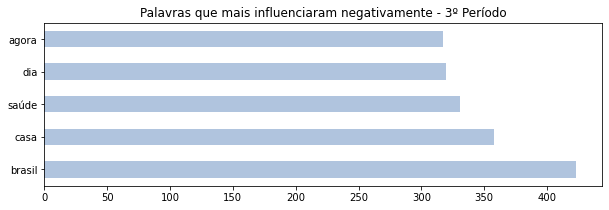

In [31]:
title = 'Palavras que mais influenciaram negativamente - 3º Período'
tokens_pos_3 = fresults.return_tokens_from_interval(df_periodo3, start, end)
fresults.generate_bar_from_tokens(tokens_pos_3, 5, 'lightsteelblue', 10, 3, title)

Hashtags que mais influenciaram positivamente

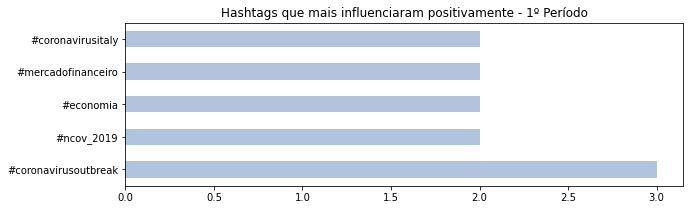

In [32]:
title = 'Hashtags que mais influenciaram positivamente - 1º Período'
fresults.generate_bar_from_filtered_tokens(tokens_pos_1, 5, '#', 'lightsteelblue', 10, 3, title)

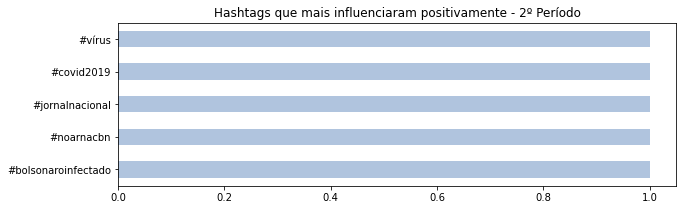

In [33]:
title = 'Hashtags que mais influenciaram positivamente - 2º Período'
fresults.generate_bar_from_filtered_tokens(tokens_pos_2, 5, '#', 'lightsteelblue', 10, 3, title)

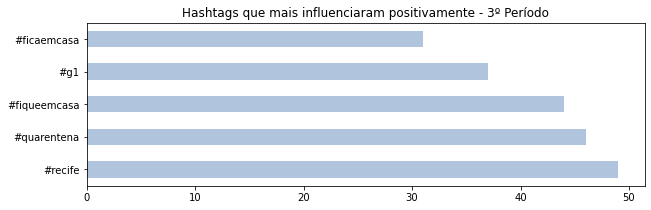

In [34]:
title = 'Hashtags que mais influenciaram positivamente - 3º Período'
fresults.generate_bar_from_filtered_tokens(tokens_pos_3, 5, '#', 'lightsteelblue', 10, 3, title)